In [1]:
# IMPORT STATEMENTS
import sys
sys.path.append("/booleanfs2/sahoo/Hegemon/")
sys.path = ["/booleanfs2/sahoo/BoNE/"] + sys.path

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3
        
import SMaRT.MacUtils as mut
reload(mut)

<module 'SMaRT.MacUtils' from '/booleanfs2/sahoo/BoNE/SMaRT/MacUtils.py'>

In [2]:
import bone
reload(bone)

# adult version 2
def get_adult_Human_small_Intestinal(self, tn=1):
    self.prepareData("T9_1", cfile="/Users/m2haque/public_html/Hegemon/explore.conf")
    atype = self.h.getSurvName("ArrayID")
    atypes = ['Top', 'Bottom']
    ahash = {
        'crypt-upper-cut1-A1':0, 'crypt-upper-cut2-A1':0, 'crypt-upper-cut3-A1':0, 'crypt-upper-cut4-A1':0,
        'crypt-upper-cut1-B1':0, 'crypt-upper-cut2-B1':0, 'crypt-upper-cut1-C1':0,
        'crypt-down-cut3-B1':1,
        'crypt-down-cut1-C1':1, 'crypt-down-cut1-A1':1}
    self.initData(atype, atypes, ahash)    
    return
bone.IBDAnalysis.get_adult_Human_small_Intestinal = get_adult_Human_small_Intestinal
# final version
def get_fetal_GSE158328_version4(self, tn=1):
    self.prepareData("T12_3", cfile="/Users/m2haque/public_html/Hegemon/explore.conf")
    atype = self.h.getSurvName("ArrayID")
    atypes = ['Top', 'Bottom']
    ahash = {
        'crypt-upper-cut2-A2':0, 'crypt-upper-cut3-A2':0,
        'extend-crypt-upper-cut1-A1':0, 'extend-crypt-upper-cut2-A1':0, 'extend-crypt-upper-cut3-A1':0,
        'crypt-down-cut3-A2':1,'crypt-down-cut4-A2':1,  
        'extend-crypt-down-cut1-A1':1, 'extend-crypt-down-cut2-A1':1}
    self.initData(atype, atypes, ahash)    
    return
bone.IBDAnalysis.get_fetal_GSE158328_version4 = get_fetal_GSE158328_version4

In [3]:
def getAdultDeg():
    dir1 = "/booleanfs2/sahoo/Data/BooleanLab/m2haque/B_Analysis/deg_analysis/"
    cfile = dir1 + "adult_condition_treated_results.csv"
    df = mut.pd.read_csv(cfile)
    wt1, l1 = [-1, 1], [list(df[(df["padj"]<0.01) & (df["log2FoldChange"]<1)]['Unnamed: 0']),
                        list(df[(df["padj"]<0.01) & (df["log2FoldChange"]>1)]['Unnamed: 0'])]
    return wt1, l1
def getFetalDegVersion4():
    dir1 = "/booleanfs2/sahoo/Data/BooleanLab/m2haque/B_Analysis/deg_analysis/deg_version3/"
    cfile = dir1 + "fetal_condition_treated_results_v4.csv"
    df = mut.pd.read_csv(cfile)
    wt1, l1 = [-1, 1], [list(df[(df["padj"]<0.01) & (df["log2FoldChange"]<1)]['Unnamed: 0']),
                        list(df[(df["padj"]<0.01) & (df["log2FoldChange"]>1)]['Unnamed: 0'])]
    return wt1, l1
def getAdultDegMac():
    dir1 = "/booleanfs2/sahoo/Data/BooleanLab/m2haque/B_Analysis/deg_analysis/"
    cfile = dir1 + "adult_condition_treated_results.csv"
    df = mut.pd.read_csv(cfile)
    top1 = list(df[df["log2FoldChange"]<0]['Unnamed: 0'])
    bottom1 = list(df[df["log2FoldChange"]>0]['Unnamed: 0'])
    df = mut.pd.read_csv("deGenes/jung-2015-diff.txt", sep="\t", header=None)
    top2 = list(df[(df[4] > 0.02)][1])
    bottom2 = list(df[(df[4] < 0)][1])
    wt1, l1 = mut.getCls13a14a3() 
    s1 = set(l1[0]).intersection(top1).intersection(bottom2)
    s2 = set(l1[1]).intersection(bottom1).intersection(top2)
    s3 = set(l1[2]).intersection(bottom1).intersection(top2)
    return wt1, [s1, s2, s3]

In [4]:
wt1, l1 = getAdultDegMac()

ana = bone.IBDAnalysis()

ana.get_adult_Human_small_Intestinal()

SP Adult version_2 (n = 10)
PMID: http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=T9_1
10 [7, 3] PMID: http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=T9_1 T9_1


In [5]:
def getVancamelbekeIBD(self, tn=1):
    self.prepareData("PLP16")
    atype = self.h.getSurvName("c src1")
    atypes = ['N', 'UC', 'CD']
    ahash = {'Biopsy from inflamed colonic mucosa of active UC patient':1,
            'Biopsy from inflamed colonic mucosa of active CD patient':2,
            'Biopsy from normal colonic mucosa of control individual':0}
    if (tn == 2):
        atypes = ['IBD', 'Normal']
        ahash = {'Biopsy from inflamed colonic mucosa of active UC patient':0,
                'Biopsy from inflamed colonic mucosa of active CD patient':0,
                'Biopsy from normal colonic mucosa of control individual':1}
    if (tn == 3):
        atypes = ['UC', 'CD']
        ahash = {'Biopsy from inflamed colonic mucosa of active UC patient':0,
                 'Biopsy from inflamed colonic mucosa of active CD patient':1}   
    for i in range(len(atypes)):
        ahash[atypes[i]] = i    
    self.initData(atype, atypes, ahash)
    return
bone.IBDAnalysis.getVancamelbekeIBD = getVancamelbekeIBD

def getArijs2009IBD(self, tn=1):
    self.prepareData("PLP27")
    atype = self.h.getSurvName("c disease")
    atypes = ['Control', 'UC', 'CD', "R", "NR", "N/A"]
    ahash = {"Yes": 3, "No": 4, "Not applicable": 5}
    if (tn == 2):
        atypes = ['IBD', 'N']
        ahash = {"UC": 0, "CD": 0, "Control": 1}
    if (tn == 3):
        atypes = ['UC', 'CD']
        ahash = {"UC": 0, "CD": 1}
    self.initData(atype, atypes, ahash)
    return
bone.IBDAnalysis.getArijs2009IBD = getArijs2009IBD

def getVanhoveIBD(self, tn=1):
    self.prepareData("PLP23")
    atype = self.h.getSurvName("c disease")
    atypes = ['Control', 'UC', 'CD', 'I', 'A', 'N']
    ahash = {'ulcerative colitis':1, "Crohn's disease":2, 'control':0,
            'active':4, 'inactive':3, 'normal': 5}
    if (tn == 2):
        atypes = ['IBD', 'N']
        ahash = {'ulcerative colitis':0, "Crohn's disease":0, 'control':1}
    if (tn == 3):
        atypes = ['UC', 'CD']
        ahash = {'ulcerative colitis':0, "Crohn's disease":1}
    self.initData(atype, atypes, ahash)
    return
bone.IBDAnalysis.getVanhoveIBD = getVanhoveIBD

def getVanderGotenIBD(self, tn=1):
    self.prepareData("PLP25")
    atype = self.h.getSurvName("c disease")
    atypes = ['Control', 'UC', 'CD', 'I', 'A', 'NA']
    ahash = {'control':0,
            'active':4, 'inactive':3, 'not applicable': 5}
    if (tn == 2):
        atypes = ['IBD', 'N']
        ahash = {'UC':0, 'CD':0, 'control':1}
    self.initData(atype, atypes, ahash)
    return
bone.IBDAnalysis.getVanderGotenIBD = getVanderGotenIBD

def getCorraliza2018(self, tn=1):
    self.prepareData("PLP71")
    atype = self.h.getSurvName("c disease")
    atypes = ['CD', 'Control']
    ahash = {"Crohn's disease (CD)":0, 'Healthy non-IBD':1}
    for i in range(len(atypes)):
            ahash[atypes[i]] = i
    self.initData(atype, atypes, ahash)
    return
bone.IBDAnalysis.getCorraliza2018 = getCorraliza2018

def getKugathasan2008(self, tn=1):
    self.prepareData("PLP76")
    atype = self.h.getSurvName("c Type")
    atypes = ['Normal', 'UC', "CD", "CD i"]
    ahash = {'Healthy control':0, 'Colon-only CD':2, 'Ileo-colonic CD':3,
                'Ulcerative colitis':1, 'Internal control':0}
    if (tn == 2):
        atypes = ['IBD', 'Healthy']
        ahash = {'Colon-only CD':0, 'Ileo-colonic CD':0, 'Ulcerative colitis':0,
                'Internal control':1, 'Healthy control':1}
    if (tn == 3):
        atypes = ['UC', 'CD']
        ahash = {'Ulcerative colitis':0, 'Colon-only CD':1, 'Ileo-colonic CD':1}
    self.initData(atype, atypes, ahash)
    return
bone.IBDAnalysis.getKugathasan2008 = getKugathasan2008

def getCarey2008(self, tn=1):
    self.prepareData("PLP79")
    atype = self.h.getSurvName("c Type")
    atypes = ['Normal', 'UC', "CD", "CD t"]
    ahash = {'healthy control reference':0, 'CD':2, 'treated CD':3, 'UC':1, 'Internal Control':0}
    if (tn == 2):
        atypes = ['IBD', 'Healthy']
        ahash = {'UC':0, 'CD':0, 'healthy control reference':1}
    if (tn == 3):
        atypes = ['UC', 'CD']
        ahash = {'UC':0, 'CD':1}
    self.initData(atype, atypes, ahash)
    return
bone.IBDAnalysis.getCarey2008 = getCarey2008

def getDenson2018(self, tn=1):
    self.prepareData("PLP86")
    atype = self.h.getSurvName("c diagnosis")
    atypes = ['Control', 'UC', 'Yes', 'No', 'NA'];
    ahash = {'Ulcerative Colitis':1}
    if (tn == 2):
        atypes = ['IBD', 'Normal']
        ahash = {'Ulcerative Colitis':0, 'Control':1}
    self.initData(atype, atypes, ahash)
    return
bone.IBDAnalysis.getDenson2018 = getDenson2018

def getBoyd2018(self, tn=1):
    self.prepareData("PLP87")
    atype = self.h.getSurvName("c condition")
    atypes = ['Control', 'UC', 'CD', 'Inactive', 'Active', 'NA'];
    ahash = {'CD active':2, 'CD inactive':2, 'control':0, 'UC active':1, 'UC inactive':1}
    if (tn == 2):
        atypes = ['IBD', 'Normal']
        ahash = {'CD active':0, 'UC active':0, 'control':1}
    if (tn == 3):
        atypes = ['UC', 'CD']
        ahash = {'UC active':0, 'CD active':1}
    self.initData(atype, atypes, ahash)
    return
bone.IBDAnalysis.getBoyd2018 = getBoyd2018



def getBreynaert2013(self, tn=1):
    self.prepareData("PLP38")
    atype = self.h.getSurvName("c colitis group")
    atypes = ['C', 'DA', 'D1', 'D2', 'D3', 'A'];
    ahash = {'2 cycles DSS with additional recovery period':1, 'control':0,
             '1 cycle DSS':2, 'acute colitis':5, '3 cycles DSS':4, '2 cycles DSS':3}
    if (tn == 2):
        atypes = ['Colitis', 'Control']
        ahash = {'2 cycles DSS with additional recovery period':0,
                 '1 cycle DSS':0, 'acute colitis':0, '3 cycles DSS':0, '2 cycles DSS':0,
                 'control':1}
    self.initData(atype, atypes, ahash)
    return
bone.IBDAnalysis.getBreynaert2013 = getBreynaert2013

def getPlanell2013(self, tn=1):
    self.prepareData("PLP88")
    atype = self.h.getSurvName("c src1")
    atypes = ['C', 'NI', 'Re', 'I']
    ahash = {
            'Human colon biopsies from UC patient with active disease (involved mucosa)':3,
            'Human colon biopsies from non-inflammatory control':0,
            'Human colon biopsies from UC patient with active disease (non-involved mucosa)':1,
            'Human colon biopsies from UC patient in remission (involved mucosa)':2}
    if (tn == 2):
        atypes = ['IBD', 'Normal']
        ahash = {
            'Human colon biopsies from UC patient with active disease (involved mucosa)':0,
            'Human colon biopsies from UC patient with active disease (non-involved mucosa)':0,
            'Human colon biopsies from non-inflammatory control':1 }
    self.initData(atype, atypes, ahash)
    return
bone.IBDAnalysis.getPlanell2013 = getPlanell2013

def getPetersIBD(self, tn=1):
    self.prepareData("PLP7")
    atype = self.h.getSurvName("c clinical condition")
    atypes = ['Normal', 'UC', 'CD']
    ahash = {"control": 0, "Ulcerative Colitis":1, "Crohn's disease":2}
    if (tn == 2):
        atypes = ['IBD', 'Normal']
        ahash = {"Ulcerative Colitis":0, "Crohn's disease":0, "control": 1}
    if (tn == 3):
        atypes = ['UC', 'CD']
        ahash = {"Ulcerative Colitis": 0, "Crohn's disease":1}
    self.initData(atype, atypes, ahash)
    return
bone.IBDAnalysis.getPetersIBD = getPetersIBD

In [9]:
def getSkrzypczak2010(self, tn=1):
    self.prepareData("CRC137")
    atype = self.h.getSurvName('c tissue')
    atypes = ['N', 'A', 'C', 'AC']
    ahash = {'adenoma':1, 'adenocarcinoma':3, 'normal colon':0, 'colon tumor':2}
    if (tn == 2):
        atypes = ['T', 'N']
        ahash = {'adenocarcinoma':0, 'normal colon':1}
    self.initData(atype, atypes, ahash)
    return
bone.IBDAnalysis.getSkrzypczak2010 = getSkrzypczak2010

def getQu2016TR(self, tn=1):
    self.prepareData("PLP50")
    atype = self.h.getSurvName("c tissue type")
    atypes = ['C', 'NC']
    ahash = {'Carcinoma':0, 'Normal crypt epithelium':1}
    self.initData(atype, atypes, ahash)
    return
bone.IBDAnalysis.getQu2016TR = getQu2016TR

def getSole2014(self, tn=1):
    self.prepareData("CRC149")
    atype = self.h.getSurvName('c sample type')
    atypes = ['N', 'T', 'M']
    ahash = {'Normal':0, 'Tumor':1, 'Mucosa':2}
    if (tn == 2):
        atypes = ['T', 'N']
        ahash = {'Tumor':0, 'Normal':1}
    self.initData(atype, atypes, ahash)
    return
bone.IBDAnalysis.getSole2014 = getSole2014

def getSkrzypczak2010(self, tn=1):
    self.prepareData("CRC137")
    atype = self.h.getSurvName('c tissue')
    atypes = ['N', 'A', 'C', 'AC']
    ahash = {'adenoma':1, 'adenocarcinoma':3, 'normal colon':0, 'colon tumor':2}
    if (tn == 2):
        atypes = ['C', 'N']
        ahash = {'adenocarcinoma':0, 'normal colon':1}
    self.initData(atype, atypes, ahash)
    return
bone.IBDAnalysis.getSkrzypczak2010 = getSkrzypczak2010


def getColonGEOPurgedNEJM(self, tn=1):
    self.prepareData("CRC90")
    atype = self.h.getSurvName('c Histology')
    atypes = ['N', 'A', 'C']
    ahash = {'Normal':0, 'Adenoma':1, 'Carcinoma':2}
    if (tn == 2):
        atypes = ['C', 'N']
        ahash = {'Carcinoma':0, 'Normal':1}
    self.initData(atype, atypes, ahash)
    return
bone.IBDAnalysis.getColonGEOPurgedNEJM = getColonGEOPurgedNEJM

def getColonGEOPurged(self, tn=1, ta=0, tb=0):
    self.prepareData("CRC145")
    atype = self.h.getSurvName('c Histology')
    atypes = ['N', 'A', 'C']
    ahash = {'Normal':0, 'Adenoma':1, 'Carcinoma':2}
    if (tn == 2):
        atypes = ['C', 'N']
        ahash = {'Carcinoma':0, 'Normal':1}
    self.initData(atype, atypes, ahash)
    return
bone.IBDAnalysis.getColonGEOPurged = getColonGEOPurged


def getLee2020RT(self, tn=1):
    self.prepareData("CRC_New_11.2", cfile="/Users/edadlani/public_html/Hegemon/explore.conf")
    atype = self.h.getSurvName("c tissue type (ch1)")
    atypes = ['N', 'C']
    ahash = {'Colorectal cancer':1, 'Normal mucosa':0}
    self.initData(atype, atypes, ahash)    
    return
bone.IBDAnalysis.getLee2020RT = getLee2020RT

In [10]:
def geBurczynski2006IBD(self, tn=1):
    self.prepareData("PLP13")
    atype = self.h.getSurvName('c Disease')
    atypes = ['UC', 'CD', 'N']
    ahash = {"Ulcerative Colitis":0, "Crohn's Disease":1, "Normal":2}
    if (tn == 2):
        atypes = ['IBD', 'N']
        ahash = {"Ulcerative Colitis":0, "Crohn's Disease":0, "Normal":1}
    self.initData(atype, atypes, ahash)
    return
bone.IBDAnalysis.geBurczynski2006IBD = geBurczynski2006IBD


def geMo2018bloodIBD(self, tn=1): 
    self.prepareData("PLP15")
    atype = self.h.getSurvName('c disease state (diagnosis)')
    atypes = ['UC', 'CD', 'N']
    ahash = {"Ulcerative Colitis":0, "Crohn's Disease":1, "Control":2}
    if (tn == 2):
        atypes = ['IBD', 'N']
        ahash = {"Ulcerative Colitis":0, "Crohn's Disease":0, "Control":1}
    self.initData(atype, atypes, ahash)
    return
bone.IBDAnalysis.geMo2018bloodIBD = geMo2018bloodIBD

def getPlanell2017bloodIBD(self, tn=1):
    self.prepareData("PLP17")
    atype = self.h.getSurvName('c subject status')
    atypes = ['UC', 'CD', 'N']
    ahash = {"Ulcerative colitis (UC) patient":0, "Crohn's disease (CD) patient":1,
                 "non-IBD (inflammatory bowel disease) control":2}
    if (tn == 2):
        atypes = ['IBD', 'N']
        ahash = {"Ulcerative colitis (UC) patient":0, "Crohn's disease (CD) patient":0,
                 "non-IBD (inflammatory bowel disease) control":1}
    self.initData(atype, atypes, ahash)
    return
bone.IBDAnalysis.getPlanell2017bloodIBD = getPlanell2017bloodIBD



def getVentham2016bloodIBD(self, tn=1): 
    self.prepareData("PLP140")
    atype = self.h.getSurvName('c disease state')
    atype = [mut.re.sub(" .*", "", str(k)) for k in atype]
    atypes = ['UC', 'CD', 'N']
    ahash = {"UC (Ulcerative colitis)":0, "CD (Crohn's disease)":1,
                 "HL (Healthy control (Lab volunteer)":2, 
                 "HL (Healthy control)":2,
                "HF (Healthy control with FHx)":2}
    if (tn == 2):
        atypes = ['IBD', 'N']
        ahash = {"UC":0, "CD":0,
                 "HL":1, "HF":1,'HC':1}
    self.initData(atype, atypes, ahash)
    return
bone.IBDAnalysis.getVentham2016bloodIBD = getVentham2016bloodIBD
 

def gePalmer2019bloodIBD(self, tn=1): 
    self.prepareData("MACV50")
    atype = self.h.getSurvName('c disease type')
    atypes = ['UC', 'CD', 'N']
    ahash = {"UC - pancolitis":0, "UC - proctitis":0, "Crohn's Disease":1,
                 "Control - infect":2, "Control - celiac":2}
    if (tn == 2):
        atypes = ['IBD', 'N']
        ahash = {"UC - pancolitis":0, "UC - proctitis":0, "Crohn's Disease":0,
                 "Control - infect":1, "Control - celiac":1 }
    self.initData(atype, atypes, ahash)
    return
bone.IBDAnalysis.gePalmer2019bloodIBD = gePalmer2019bloodIBD



def geOstrowski2019bloodIBD(self, tn=1): 
    self.prepareData("MACV51")
    atype = self.h.getSurvName('c condition')
    atypes = ['UC', 'CD', 'N']
    ahash = {"Ulcerative Colitis":0, "Crohn's Disease":1, "Control":2}
    if (tn == 2):
        atypes = ['IBD', 'N']
        ahash = {"ulcerative colitis":0, "Crohn's disease":0, "control":1}
    self.initData(atype, atypes, ahash)
    return
bone.IBDAnalysis.geOstrowski2019bloodIBD = geOstrowski2019bloodIBD


def getMishra2022ibd(self, tn=1): 
    self.prepareData("MACV300")
    atype = self.h.getSurvName('c diagnosis')

    atypes = ['UC', 'CD']
    ahash = {"UC":0, "CD":1}

    self.initData(atype, atypes, ahash)
    return
bone.IBDAnalysis.getMishra2022ibd = getMishra2022ibd

In [11]:
def getToedter2011TR(self,tn=1): #GSE23597
    self.prepareData("IBD78", cfile="/Users/dtv004/public_html/Hegemon/explore.conf")
    atype = self.h.getSurvName('c dosage_time_resp_ch1')

    if tn == 1:
        atypes = ['IFX-w0', 'IFX-w8-R', 'IFX-w30-R', 'IFX-w8-NR', 'IFX-w30-NR']
        ahash = {'5mg/kg_w0':0,
                 '5mg/kg_w8_No':3,
                 '5mg/kg_w8_Yes':1,
                 '5mg/kg_w30_Yes':2,
                 '5mg/kg_w30_No':4}

    if tn == 2:
        atypes = ['IFX-w0', 'IFX-w8-R', 'IFX-w30-R', 'IFX-w8-NR', 'IFX-w30-NR']
        ahash = {'10mg/kg_w0':0,
                 '10mg/kg_w8_Yes':1,
                 '10mg/kg_w30_Yes':2,
                 '10mg/kg_w30_No':4,
                 '10mg/kg_w8_No':3}
    self.initData(atype, atypes, ahash)
    return
bone.IBDAnalysis.getToedter2011TR = getToedter2011TR



def getArijs2009TR(self, tn=1):
    
    if tn == 1:
        self.prepareData("IBD50", cfile="/Users/dtv004/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c WK8RSPHM')
        atypes = ['UC-IFX-R', 'UC-IFX-NR']
        ahash = {'Yes':0,'No':1}
        self.initData(atype, atypes, ahash)

    if tn  == 2:
        self.prepareData("IBD22", cfile="/Users/dtv004/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c response to infliximab')
        atypes = ['C', 'UC-IFX-R','UC-IFX-NR']
        ahash = {'Not applicable':0,'Yes':1,'No':2}
        self.initData(atype, atypes, ahash)
        
    if tn  == 3: #GSE16879
        self.prepareData("IBD19", cfile="/Users/dtv004/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c src1')
        atypes = ['Cc', 'CDc-IFX-R-B','CDc-IFX-R-A','CDc-IFX-NR-B','CDc-IFX-NR-A']
        ahash = {'Colonic mucosal biopsy from control individual':0,
                 'Colonic mucosal biopsy from CDc responder before first infliximab treatment':1,
                 'Colonic mucosal biopsy from CDc responder after first infliximab treatment':2,
                 'Colonic mucosal biopsy from CDc non-responder before first infliximab treatment':3,
                 'Colonic mucosal biopsy from CDc non-responder after first infliximab treatment':4}

        self.initData(atype, atypes, ahash)
        return
bone.IBDAnalysis.getArijs2009TR = getArijs2009TR


def getArijs2009UC(self, tn=1):
    self.prepareData("IBD19", cfile="/Users/dtv004/public_html/Hegemon/explore.conf")
    atype = self.h.getSurvName('c src1')
    atypes = ['C', 'UC-IFX-R-B','UC-IFX-R-A','UC-IFX-NR-B','UC-IFX-NR-A']
    ahash = {'Colonic mucosal biopsy from control individual':0,
             'Colonic mucosal biopsy from UC responder before first infliximab treatment':1,
             'Colonic mucosal biopsy from UC responder after first infliximab treatment':2,
             'Colonic mucosal biopsy from UC non-responder before first infliximab treatment':3,
             'Colonic mucosal biopsy from UC non-responder after first infliximab treatment':4}
    self.initData(atype, atypes, ahash)
    return
bone.IBDAnalysis.getArijs2009UC = getArijs2009UC

def getLeclerc2004(self, tn=1):
    self.prepareData("PLP45")
    atype = self.h.getSurvName("c src1")
    atypes = ['N', 'T']
    ahash = {'Normal intestine':0, 'Tumor':1}
    self.initData(atype, atypes, ahash)
    return
bone.IBDAnalysis.getLeclerc2004 = getLeclerc2004

Toedter 2011 IFX UC (n = 113)
GSE23597 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=IBD78
37 [15, 11, 6, 2, 3] GSE23597 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=IBD78 IBD78
[19, 100, 84]


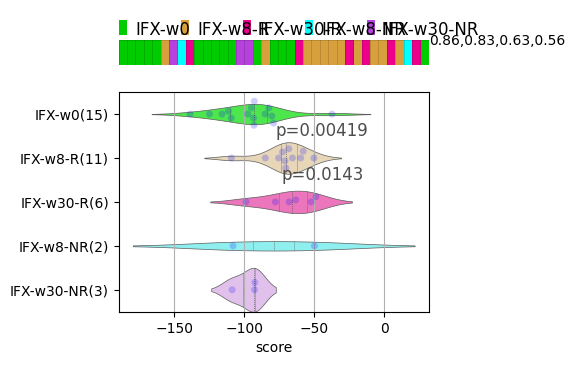

In [12]:
wt1, l1 = getAdultDegMac() # version 2

ana = bone.IBDAnalysis()



# Therapeutics

ana.getToedter2011TR(1)
# ana.getArijs2009TR(3)
# ana.getArijs2009UC(1)


# IBD BLOOD

# ana.geBurczynski2006IBD(2)
# ana.geMo2018bloodIBD(2)
# ana.getPlanell2017bloodIBD(2) #n
# ana.gePalmer2019bloodIBD(2)
# ana.getVentham2016bloodIBD(2)


# ana.geOstrowski2019bloodIBD(2) # nw
# ana.getMishra2022ibd(1) # CD VS UC



# Normal vs Cancer

# ana.getQu2016TR(4)
# ana.getSkrzypczak2010(2) 
# ana.getSkrzypczak2010(2)
# ana.getColonGEOPurged(2)
# ana.getColonGEOPurgedNEJM(2)
# ana.getSole2014(2)




fig = bone.processData(ana, l1, wt1, desc=None, violin=1)
# strname = str(ana.name)
# fig.savefig(f'IFX_{strname}.pdf', dpi=100, transparent=True,bbox_inches = 'tight')

In [12]:
from matplotlib import pyplot as plt
acolor = ["#00CC00", "#D8A03D","#EC008C",
          'cyan', "#B741DC", "#808285",
          'blue', 'black', 'green', 'red',
          'orange', 'brown', 'pink', 'purple']
def plotViolinBar(ana, desc=None):
    global acolor
    fig = plt.figure(figsize=(5,7), dpi=100)
    plt.subplots_adjust(hspace=0, wspace=0)

    ax1 = plt.subplot2grid((10, 1), (0, 0))
    ax2 = plt.subplot2grid((10, 1), (2, 0), rowspan=5)
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
              'genes': [], 'ax': ax1, 'acolor': acolor}
    ax = ana.printTitleBar(params)
    res = ana.getROCAUC()
    ax.text(len(ana.cval[0]), 4, res)
#     res = ana.getMetrics(ana.cval[0])
#     ax.text(len(ana.cval[0]), 4, ",".join(res))
    strname = str(ana.source +" " + ana.name)
    if desc is not None:
        ax.text(-1, 2, strname, horizontalalignment='right',
                    verticalalignment='center')
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
            'genes': [], 'ax': ax2, 'acolor': acolor, 'vert': 0}
    ax.text(1, 0.1, strname, horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)
    ax = ana.printViolin(None, params)
    
    return fig

def plotDensityBar(ana, desc=None):
    fig = plt.figure(figsize=(10,10), dpi=100)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    ax1 = plt.subplot2grid((4, 1), (0, 0))
    ax2 = plt.subplot2grid((4, 1), (1, 0), rowspan=4)
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
              'genes': [], 'ax': ax1, 'acolor': acolor}
    ax = ana.printTitleBar(params)
    res = ana.getMetrics(ana.cval[0])
    ax.text(len(ana.cval[0]), 4, ",".join(res))
    if desc is not None:
        ax.text(-1, 2, desc, horizontalalignment='right',
                    verticalalignment='center')
    ax = ana.densityPlot(ax2, acolor)
    return fig

def processData(ana, l1, wt1, desc=None, violin=1):
    ana.orderData(l1, wt1)
    if (violin == 1):
        return plotViolinBar(ana, desc)
    return plotDensityBar(ana, desc)

Vancamelbeke 2017 IBD (n = 194)
GSE75214 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP16
93 [82, 11] GSE75214 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP16 PLP16
[9, 32, 36]
Arijs 2009 IBD IFX RMA (n = 133)
GSE16879 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP27
133 [121, 12] GSE16879 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP27 PLP27
[19, 102, 86]
Vanhove 2015 IBD (n = 116)
GSE59071 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP23
116 [105, 11] GSE59071 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP23 PLP23
[9, 32, 36]
Van der Goten 2014 IBD (n = 21)
GSE48958 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP25
21 [13, 8] GSE48958 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP25 PLP25
[9, 32, 36]
Corraliza 2018 CD HSCT (n = 80)
GSE115390 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP71
80 [44, 36] GSE115390 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=P

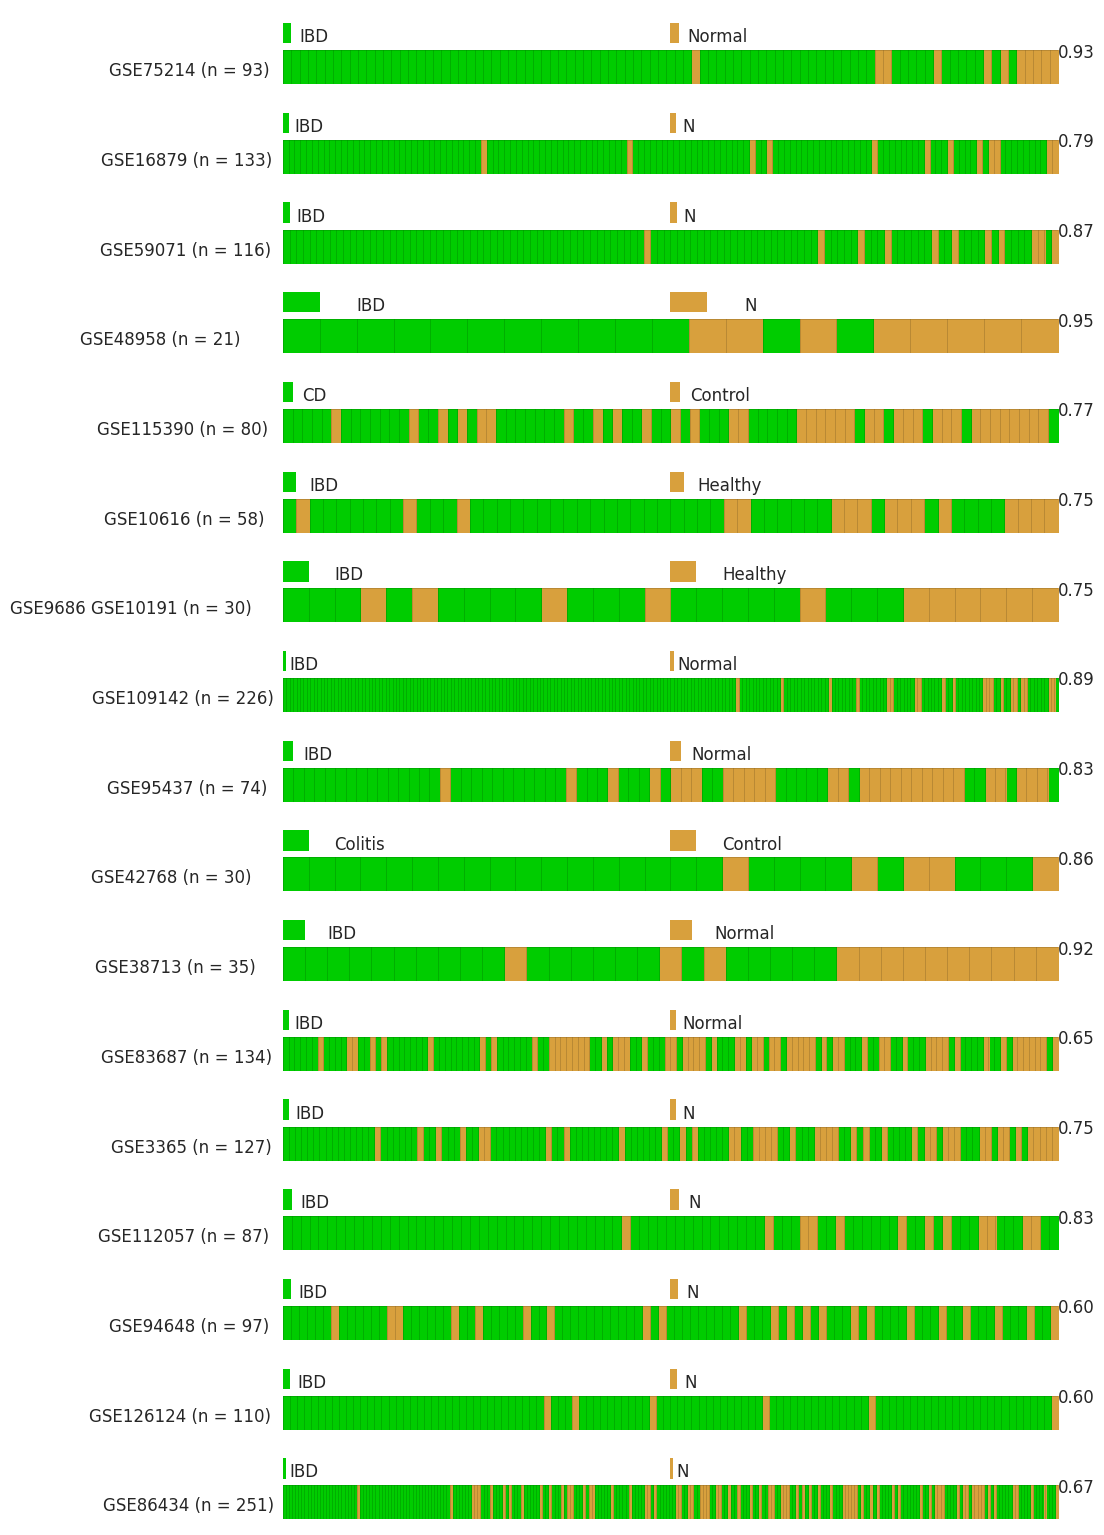

In [61]:
def plotValidationMac(ana, l1, wt1, ax):
    ana.orderData(l1, wt1)
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 
             'tAnn': 1, 'widthAnn':1, 'acolor': acolor,
             'w': 1, 'h': 0.8, 'ax': ax}
    ax = ana.printTitleBar(params)
    res = ana.getROCAUC()
#     print(desc, res)
    desc = ana.name
    ax.text(len(ana.cval[0]), 4, res)
    sNum = str(" (n = " + str(len(ana.order)) + ") ")
#     strname = str(ana.source+sNum + ana.name)
    strname = str(ana.source+sNum)
    if desc is not None:
        ax.text(-1, 2, strname, horizontalalignment='right',
                    verticalalignment='center')
    ax.text(1, 0.1, " " , horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)


def comparativeAnalysisIBD():
    fig = mut.plt.figure(figsize=(10,20), dpi=100)
    n1 = 17
    axlist = []
    for i in range(n1):
        ax = mut.plt.subplot2grid((n1, 1), (i, 0))
        axlist.extend([ax])

    wt1, l1 = getAdultDegMac()
    ana = bone.IBDAnalysis()
    
    ana.getVancamelbekeIBD(2)
    plotValidationMac(ana, l1, wt1, axlist[0])
    
    ana.getArijs2009IBD(2)
    plotValidationMac(ana, l1, wt1, axlist[1])
    
    ana.getVanhoveIBD(2)
    plotValidationMac(ana, l1, wt1, axlist[2])
    
    ana.getVanderGotenIBD(2)
    plotValidationMac(ana, l1, wt1, axlist[3])
    
    ana.getCorraliza2018(1)
    plotValidationMac(ana, l1, wt1, axlist[4])
    
    ana.getKugathasan2008(2)
    plotValidationMac(ana, l1, wt1, axlist[5])
    
    ana.getCarey2008(2)
    plotValidationMac(ana, l1, wt1, axlist[6])
    
    ana.getDenson2018(2)
    plotValidationMac(ana, l1, wt1, axlist[7])
    
    ana.getBoyd2018(2)
    plotValidationMac(ana, l1, wt1, axlist[8])
    
    ana.getBreynaert2013(2) 
    plotValidationMac(ana, l1, wt1, axlist[9])
    
    ana.getPlanell2013(2)
    plotValidationMac(ana, l1, wt1, axlist[10])
    
    ana.getPetersIBD(2)
    plotValidationMac(ana, l1, wt1, axlist[11])
    
    #IBD BLOOD
    ana.geBurczynski2006IBD(2)
    plotValidationMac(ana, l1, wt1, axlist[12])
    
    ana.geMo2018bloodIBD(2)
    plotValidationMac(ana, l1, wt1, axlist[13])
    
    ana.getPlanell2017bloodIBD(2) 
    plotValidationMac(ana, l1, wt1, axlist[14])
    
    ana.gePalmer2019bloodIBD(2)
    plotValidationMac(ana, l1, wt1, axlist[15])
    
    ana.getVentham2016bloodIBD(2)
    plotValidationMac(ana, l1, wt1, axlist[16])
    

#     fig.savefig("IBD_NORMAL_BLOOD_validation.pdf", dpi=100, transparent=True,bbox_inches = 'tight')
    
comparativeAnalysisIBD()


Qu 2016 Normal Adenoma Cancer (n = 58)
GSE77953 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP50
24 [17, 7] GSE77953 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP50 PLP50
[15, 67, 67]
Skrzypczak 2010 NoAdCa (n = 145)
GSE20916 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC137
70 [36, 34] GSE20916 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC137 CRC137
[12, 71, 61]
Global 2018 GPL570 Colon Purged (n = 1911)
GEO CRC115 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC145
1832 [1662, 170] GEO CRC115 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC145 CRC145
[6, 20, 21]
Dalerba Sahoo 2016 NEJM GPL570 Colon Purged (n = 1832)
GEO http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC90
1832 [1662, 170] GEO http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC90 CRC90
[19, 102, 86]
Sole 2014 crc (n = 246)
GSE44076 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC149
196 [98, 98] GSE44076 http://hegemon.ucs

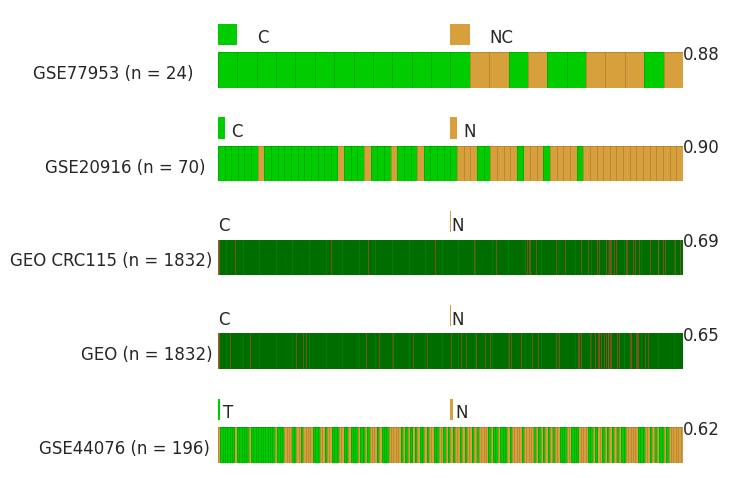

In [63]:
def plotValidationMac(ana, l1, wt1, ax):
    ana.orderData(l1, wt1)
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 
             'tAnn': 1, 'widthAnn':1, 'acolor': acolor,
             'w': 1, 'h': 0.8, 'ax': ax}
    ax = ana.printTitleBar(params)
    res = ana.getROCAUC()
#     print(desc, res)
    desc = ana.name
    ax.text(len(ana.cval[0]), 4, res)
    sNum = str(" (n = " + str(len(ana.order)) + ") ")
#     strname = str(ana.source+sNum + ana.name)
    strname = str(ana.source+sNum)
    if desc is not None:
        ax.text(-1, 2, strname, horizontalalignment='right',
                    verticalalignment='center')
    ax.text(1, 0.1, " " , horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)


def comparativeAnalysisNsvC():
    fig = mut.plt.figure(figsize=(6,6), dpi=100)
    n1 = 5
    axlist = []
    for i in range(n1):
        ax = mut.plt.subplot2grid((n1, 1), (i, 0))
        axlist.extend([ax])

    wt1, l1 = getAdultDegMac()
    ana = bone.IBDAnalysis()
    
    
    ana.getQu2016TR(4)
    plotValidationMac(ana, l1, wt1, axlist[0])
    
    ana.getSkrzypczak2010(2) 
    plotValidationMac(ana, l1, wt1, axlist[1])
    
    ana.getColonGEOPurged(2)
    plotValidationMac(ana, l1, wt1, axlist[2])
    
    ana.getColonGEOPurgedNEJM(2)
    plotValidationMac(ana, l1, wt1, axlist[3])
    
    ana.getSole2014(2)
    plotValidationMac(ana, l1, wt1, axlist[4])
    
    
    

#     fig.savefig("CARCINOMA_NORMAL_validation.pdf", dpi=100, transparent=True,bbox_inches = 'tight')

comparativeAnalysisNsvC()

Vancamelbeke 2017 IBD (n = 194)
GSE75214 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP16
82 [74, 8] GSE75214 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP16 PLP16
[9, 32, 36]
Arijs 2009 IBD IFX RMA (n = 133)
GSE16879 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP27
121 [48, 73] GSE16879 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP27 PLP27
[19, 102, 86]
Vanhove 2015 IBD (n = 116)
GSE59071 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP23
105 [97, 8] GSE59071 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP23 PLP23
[9, 32, 36]
Kugathasan 2008 CD (n = 58)
GSE10616 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP76
42 [10, 32] GSE10616 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP76 PLP76
[19, 102, 86]
Carey 2008 IBD (n = 43)
GSE9686 GSE10191 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP79
19 [8, 11] GSE9686 GSE10191 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=P

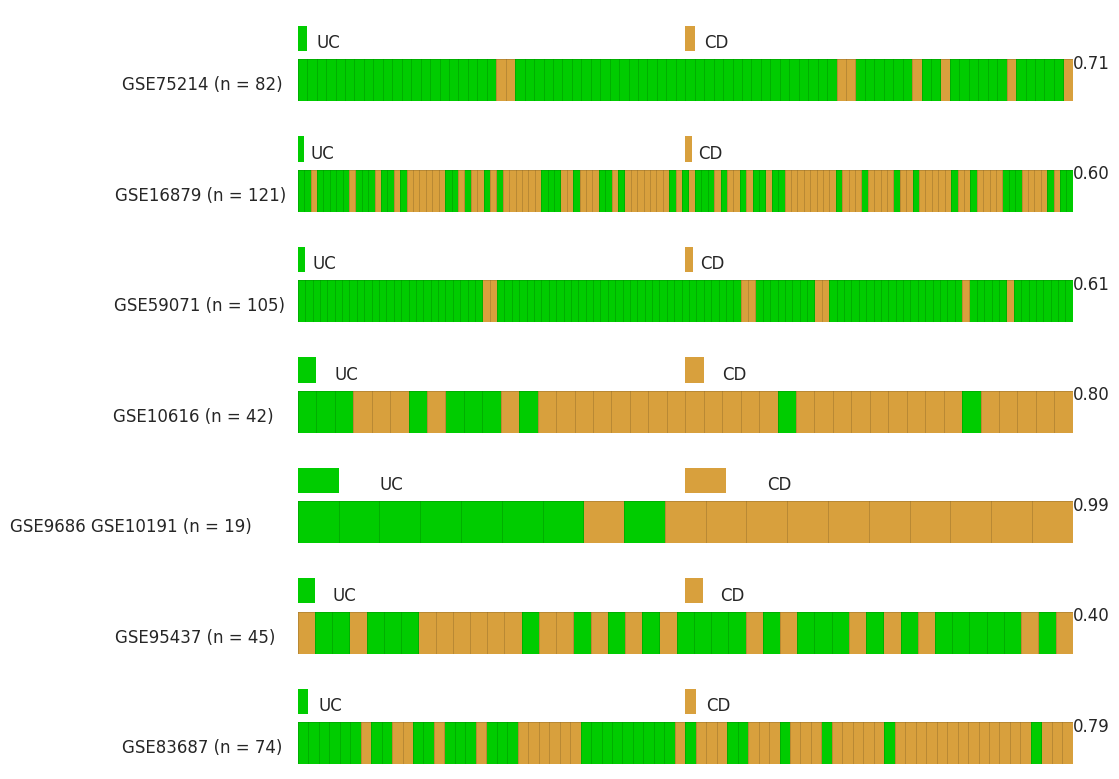

In [22]:
def plotValidationMac(ana, l1, wt1, ax):
    ana.orderData(l1, wt1)
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 
             'tAnn': 1, 'widthAnn':1, 'acolor': acolor,
             'w': 1, 'h': 0.8, 'ax': ax}
    ax = ana.printTitleBar(params)
    res = ana.getROCAUC()
#     print(desc, res)
    desc = ana.name
    ax.text(len(ana.cval[0]), 4, res)
    sNum = str(" (n = " + str(len(ana.order)) + ") ")
#     strname = str(ana.source+sNum + ana.name)
    strname = str(ana.source+sNum)
    if desc is not None:
        ax.text(-1, 2, strname, horizontalalignment='right',
                    verticalalignment='center')
    ax.text(1, 0.1, " " , horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)


def comparativeAnalysisIBD():
    fig = mut.plt.figure(figsize=(10,10), dpi=100)
    n1 = 7
    axlist = []
    for i in range(n1):
        ax = mut.plt.subplot2grid((n1, 1), (i, 0))
        axlist.extend([ax])

    wt1, l1 = getAdultDegMac()
    ana = bone.IBDAnalysis()
    
    ana.getVancamelbekeIBD(3)
    plotValidationMac(ana, l1, wt1, axlist[0])
    
    ana.getArijs2009IBD(3)
    plotValidationMac(ana, l1, wt1, axlist[1])
    
    ana.getVanhoveIBD(3)
    plotValidationMac(ana, l1, wt1, axlist[2])
    
    ana.getKugathasan2008(3)
    plotValidationMac(ana, l1, wt1, axlist[3])
    
    ana.getCarey2008(3)
    plotValidationMac(ana, l1, wt1, axlist[4])
    
    ana.getBoyd2018(3)
    plotValidationMac(ana, l1, wt1, axlist[5])
    
    ana.getPetersIBD(3)
    plotValidationMac(ana, l1, wt1, axlist[6])
    

    fig.savefig("CD_VS_UC_validation.pdf", dpi=100, transparent=True,bbox_inches = 'tight')
#     fig.savefig("adult_validation_withoutName.pdf", dpi=100, transparent=True,bbox_inches = 'tight')
    
comparativeAnalysisIBD()